# Machine learning

Machine learning, repaso, interpretaciones que solo humanos podían manejar; texto a mano, predicciones, video, etc

scikit-learn (libreria) va a ser nuestra principal libreria de ML tiene muchos modelos internos ya hechos de ML

scikit-learn nos facilita las mates sin tener que entenderlas (Yo no tengo que saber como funciona un motor para saber conducir)

-------------------------------------------------------------

Por ahora nuestro esquema mental de ML es este::::

## ML supervisado (con etiquetas)

    - Clasificación (Separa por estructuras)
    - Regresión (Saca un valor aproximado)

##### ML no supervisado (Detecta comandos)

## 15.2- Caso de Estudio - Clasificación

Tratar de hacer mediante una etiqueta escrita a mano que la maquina sepa hacia donde tiene que ir el correo (Clasificación)

### K-Nearest Neighbors

El algoritmo K-Nearest Neighbors(KNN) clasifica un elemento desconocido según los elementos que tiene más cerca.

KNN para scikit-learn es un algoritmo de tipo estimador.

1. Número de vecinos(n_neighbors):
  Es el principal valor que tú decides.
  Cuantos más vecinos uses, más "suave" será la clasificación
2. Otros parametros:
  El programa ajusta automaticamente, pre puedes modificarlos más adelante para mejorar el rendimiento.

----------------------------------------------------------------

### Hiperparámetros

El número de vecinos (y otros ajustes) son hiperparámetros, es decir, valores que decides antes de entrenar el modelo.
Al principio puedes dejar los valores por defecto, pero lo ideal es probar diferentes combinaciones para encontrar la que mejor funcione.

### 15.2.1.- Cargar el dataset

Carga load_digits desde sklearn.datasets y luego metelo en un objeto

In [1]:
from sklearn.datasets import load_digits

Imprime la descripcion del dataset

In [2]:
digits = load_digits()

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

Checa el target de tu nuevo objeto digitos

In [4]:
digits.target[::100] # Una muesrta cada 100 imágenes del valor en digito

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

Ahora prueba revisando la forma del arreglo digitos

In [5]:
digits.data.shape # Estructura de datos imagenes-digito

(1797, 64)

Y la forma del arreglo target

In [6]:
digits.target.shape #La forma del vector de etiquetas (una etiqueta por imagen)

(1797,)

Vamos revisando la imagen 15 del arreglo... no es lo que esperas

In [7]:
digits.images[15]

array([[ 0.,  5., 12., 13., 16., 16.,  2.,  0.],
       [ 0., 11., 16., 15.,  8.,  4.,  0.,  0.],
       [ 0.,  8., 14., 11.,  1.,  0.,  0.,  0.],
       [ 0.,  8., 16., 16., 14.,  0.,  0.,  0.],
       [ 0.,  1.,  6.,  6., 16.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 16.,  3.,  0.,  0.],
       [ 0.,  1.,  5., 15., 13.,  0.,  0.,  0.],
       [ 0.,  4., 15., 16.,  2.,  0.,  0.,  0.]])

y ahora veamos el .data para ver el arreglo en 1x64

In [8]:
digits.data[15] #Versión formateada a 1x64

array([ 0.,  5., 12., 13., 16., 16.,  2.,  0.,  0., 11., 16., 15.,  8.,
        4.,  0.,  0.,  0.,  8., 14., 11.,  1.,  0.,  0.,  0.,  0.,  8.,
       16., 16., 14.,  0.,  0.,  0.,  0.,  1.,  6.,  6., 16.,  0.,  0.,
        0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  1.,  5., 15.,
       13.,  0.,  0.,  0.,  0.,  4., 15., 16.,  2.,  0.,  0.,  0.])

#### ¿Por qué queremos 1x64

Cada imagen del dataset Digits del scikit-learn es de  8x8 pixeles.
En lugar de guardar la imagen como una matriz 8x8, el dataset la "aplana" (flatten) para representar cada imagen como un vector de 64 características (8x8=64)

Esto permite que los modelos de machine learning (como los clasificadores de sklearn) puedan trabajar con los datos, ya que la mayoria de los algorítmos esperan vectores unidimensionales de características numéricas, no matrices de píxeles.

### 15.2.2.- Visualizar los datos

Veamos los datos utilizando matplotlib, comienza importando esta libreria

In [9]:
import matplotlib.pyplot as plt

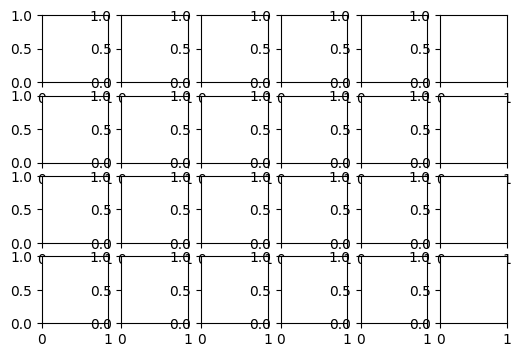

In [10]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize =(6,4))

Ahor adibuja una cuadricula para lograr tu cometido

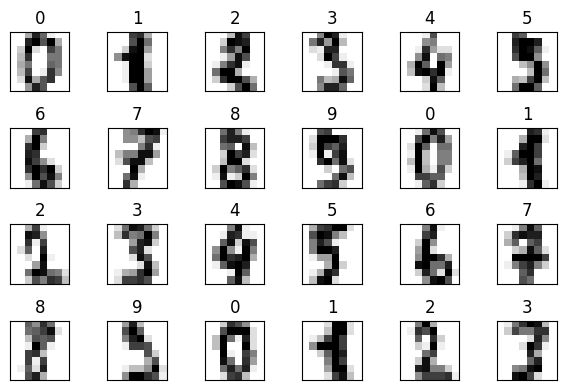

In [11]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize =(6,4))
for item in zip(axes.ravel(),digits.images,digits.target):
    axes,image,target = item
    axes.imshow(image,cmap=plt.cm.gray_r)
    axes. set_xticks([])
    axes. set_yticks([])
    axes. set_title(target)
plt.tight_layout()

a continuación, vamos a usar un for paraiterar en paralelo a traves de los 24 cuadritos y traer las priemras 24 imagenes

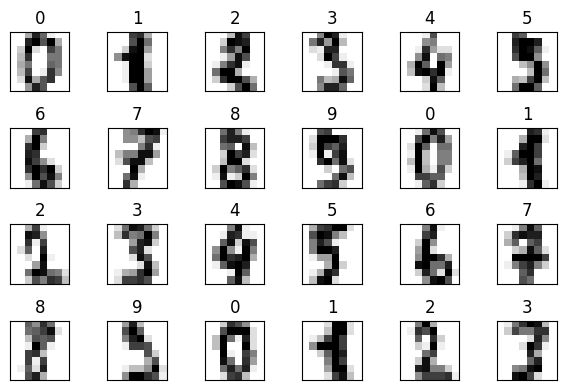

In [12]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize =(6,4))
for item in zip(axes.ravel(),digits.images,digits.target):
    axes,image,target = item
    axes.imshow(image,cmap=plt.cm.gray_r)
    axes. set_xticks([])
    axes. set_yticks([])
    axes. set_title(target)
plt.tight_layout()

### 15.2.3.- Separar el dataset para entrenamientos y pruebas

###### Explicación "train_test_split"

- ¿Que hace?
    - Divide tu dataset en 2 partes:
        - Entrenamiento (para que el modelo aprenda)
        - Prueba (para ver si el modelo generaliza correctamente)
    - ¿Que devuelve?
        - X_train -> Datos de entrenamiento (imagenes, muestras, etc)
        - X_test -> Datos a probar
        - Y_train -> Etiquetas correctas de X_train
        - Y_test -> Etiquetas correctas de X_test
    - Alternativas
        - ShuffleSplit

ok, ahora vamos a importar train_test_split desde sklearn.model_selection

In [13]:
from sklearn.model_selection import train_test_split

Y a continuación generar el split entre test y train

In [14]:
X_train, X_test, y_train,y_test = train_test_split(digits.data,digits.target,random_state=11) #Damos los datos divididos entre entrenamiento (X_train) y prueba (X_test),,,, los objetivos(target(etiquetas)) van a "y_train e y_test"
#random_state es la semilla del randomizer

Veamos las shapes de nuestros sets para X (muestras)

In [15]:
X_train.shape #Datos de entrenamiento (75%)

(1347, 64)

In [16]:
X_test.shape #Datos de prueba (25%)

(450, 64)

### 15.2.4.- Crear el modelo

Ahora importamos el KNeighborsClassifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier

y armamos un objeto llamado KNN de este Clasificador

In [18]:
knn = KNeighborsClassifier() #Estimador tipo KneighborsClassifier
#Dentro de la clase KNeighborsClassifier está la lógica matemática para hacer este tipo de ralación

### 15.2.5.- Entrenar el modelo

Ahora arma el método fit para cargar los datos en el estimador

In [19]:
knn.fit(X=X_train, y=y_train) #Evaluación floja (Está cargado pero aún no lo muestra hasta que yo se lo pida)

KNeighborsClassifier()

### 15.2.6.- Predecir clases de dígitos

Arma un objeto llamdo prediccion

In [20]:
prediccion = knn.predict(X=X_test)

Arma un objeto llamado esperado

In [21]:
esperado = y_test

Comparemos predicho vs esperado

In [22]:
prediccion[:20] #Estimación de ML

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [23]:
esperado[:20] #Valor real de las etiquetas

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

armamos una comprension de lista para localizar todas las predicciones incorrectas

In [24]:
list_incorrectas =[]
for i in esperado:
    for j in prediccion:
        if (prediccion[i]!=esperado[j]):
            list_incorrectas =prediccion[j]
            print(f'Esperado:{esperado[i]}, Predicción:{prediccion[j]}')

Esperado:0, Predicción:3
Esperado:0, Predicción:9
Esperado:0, Predicción:4
Esperado:0, Predicción:3
Esperado:0, Predicción:4
Esperado:0, Predicción:1
Esperado:0, Predicción:3
Esperado:0, Predicción:3
Esperado:0, Predicción:4
Esperado:0, Predicción:1
Esperado:0, Predicción:9
Esperado:0, Predicción:9
Esperado:0, Predicción:5
Esperado:0, Predicción:1
Esperado:0, Predicción:4
Esperado:0, Predicción:4
Esperado:0, Predicción:4
Esperado:0, Predicción:9
Esperado:0, Predicción:9
Esperado:0, Predicción:4
Esperado:0, Predicción:5
Esperado:0, Predicción:4
Esperado:0, Predicción:1
Esperado:0, Predicción:3
Esperado:0, Predicción:3
Esperado:0, Predicción:4
Esperado:0, Predicción:1
Esperado:0, Predicción:9
Esperado:0, Predicción:1
Esperado:0, Predicción:1
Esperado:0, Predicción:9
Esperado:0, Predicción:4
Esperado:0, Predicción:1
Esperado:0, Predicción:1
Esperado:0, Predicción:5
Esperado:0, Predicción:5
Esperado:0, Predicción:4
Esperado:0, Predicción:4
Esperado:0, Predicción:9
Esperado:0, Predicción:3


In [25]:
incorrectas_list=[(p,e) for (p,e) in zip(prediccion,esperado) if p!=e]

In [26]:
incorrectas_list

[(np.int64(5), np.int64(3)),
 (np.int64(8), np.int64(9)),
 (np.int64(4), np.int64(9)),
 (np.int64(7), np.int64(3)),
 (np.int64(7), np.int64(4)),
 (np.int64(2), np.int64(8)),
 (np.int64(9), np.int64(8)),
 (np.int64(3), np.int64(8)),
 (np.int64(3), np.int64(8)),
 (np.int64(1), np.int64(8))]

Este modelo esta muy mascado y es muy facil pero en la vida real del programador, hay que hacer muchas cosas y preocuparse por otras tantas:

    1.- Pensar que por cada imagen hay que pasar cada pixel a un valor numérico, etc(80% del curro, limpieza de datos)
    
    2.- Nosotros hemos ido con la idea de hacer un modelo de clasificación KNN, no nos hemos metido en el verengenal de: que modelo sería el ideal para esta tarea ni si sería necesario modificar hiperparámetros para mejorar la deducción de valores, etc

## 15.3 Clasificación parte 2 - Dataset de digitos (Intentar evaluar si nuestro modelo es bueno o es malo)

### 15.3.1.- Metricas para la exactitud del modelo

Usa knn.score para conocer que tan bien se desempeño tu estimador

In [27]:
print(f'{knn.score(X_test, y_test):.2%}')

97.78%


Ahora vamos a ahacer una matriz de confusion para ver los hits y misses para una clase dada, llama la funcion matriz de confusión desde sklearn metricsModule

In [28]:
from sklearn.metrics import confusion_matrix

Y ahora armar tu matriz de confusion

In [29]:
confusion = confusion_matrix(y_true=esperado, y_pred=prediccion)

Checa los resultados

In [30]:
confusion # Las filas son el número real y las columnas son el número que devolvió la predicción

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]])

Ahora sigue un reporte de calsificación, importa classification_report desde sklearn.metrics

In [31]:
from sklearn.metrics import classification_report

Y ahora crea una comprension de lista que nos de los nombres de los digitos

In [32]:
nombres = [str(digit) for digit in digits.target_names]

Y termina haciendo tu reporte de clasificacion

In [33]:
nombres

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [34]:
print(classification_report(esperado,prediccion,target_names = nombres))
#recall = verdaderos positivos/total positivos
#f1-score = promedio(entre precision y recall)
#support = nº de muestras con un valor esperado dado

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Y ahora ahremos un heatmap con la matriz de confusion

In [35]:
import pandas as pd

In [36]:
confusion_df = pd.DataFrame(confusion,index = range(10),columns = range(10))

In [37]:
import seaborn as sns

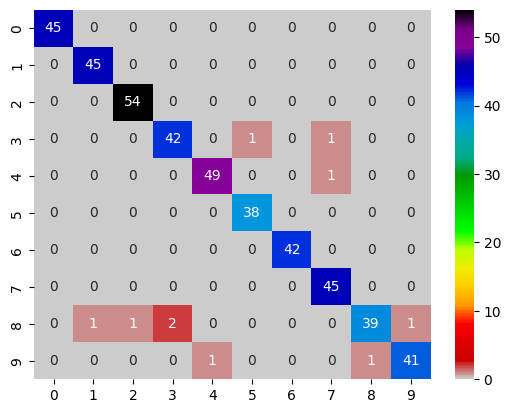

In [38]:
axes = sns.heatmap(confusion_df,annot = True, cmap="nipy_spectral_r")

### 15.3.2.- K-Fold Validación Cruzada

La validación cruzada con K-Fold es una técnica que se usa para comprobar qué tan bien un modelo de ML aprende realmente y no solo memoriza los datos (lo que se llama overfitting).

En lugar de entrenar el modelo una sola vez con unos datos y probarlo con otros, la validación K-Fold divide todo el conjunto de datos en K partes iguales, llamadas folds (pliegues).

Luego el modelo se entrena y evaluá K veces:
- En cada una de estas veces, se usa una parte diferente como conjunto de prueba
- Y las K-1 partes restantes se usan para entrenar

Así, cada parte del dataset se usa una vez para probar y varias veces para entrenar, lo que da una evaluación mucho más equilibrada.

Al final, se calculan las métricas (la exactitud con accuracy) de cada una de las K pruebas y se hacen el promedio. Ese valor representa el rendimiento real del modelo, que tiene en cuenta su comportamiento en distintas divisiones del mismo conjunto de datos.

Resumen:
 - "K" es el nº de divisiones o grupos
 - "Fold" significa cada bloque o pliegue de datos 
 - Sirve para evaluar modelos de manera más fiable y evitar conclusiones erróneas por haber tenido una partición de datos "con suerte" o "mala"

Importa kfold desde sklearn.modelselection

In [39]:
from sklearn.model_selection import KFold

Crea tu primer objeto kfold

In [40]:
kfold = KFold(n_splits = 10, random_state = 11, shuffle = True)
# n_splits = número de veces que voy a entrenar
# random_state = semilla
# shuffle = aleatoriza el orden de los datos antes de formar los pliegues

Ahora importa cross_val_score

In [41]:
from sklearn.model_selection import cross_val_score

Y crea un objeto llamado puntuacion para probar tu modelo

In [42]:
puntuacion = cross_val_score(estimator = knn, X=digits.data, y=digits.target,cv=kfold)
#estimador = knn define que tipo de clasificaion se va a usar
#cv = toma los datos de kfold para ver cuantas veces entrenará el modelo y la naturaleza del randomizaer

Checa los resultados

In [43]:
puntuacion.mean()

np.float64(0.9872067039106145)

In [44]:
puntuacion

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98324022])

In [45]:
puntuacion.std()

np.float64(0.007477762811951388)

In [46]:
# Que demuestra esto; cuantos más datos usamos para análisis de datos (KFold usa todo y varias veces) mejor es la aproximación o deducción del programa (en este caso KNN que antes solo usaba el 75% para entrenar)

### 15.3.3.- Varios Modelos hasta dar con el bueno (Vamos a probar diferentes estimadores hasta ver cual funciona mejor para los datos que tenemos)

Importa SVC y GaussianNB

In [47]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

Crea los estimadores en un diccionario

In [48]:
estimadores = {"KNeighborsClassifier":knn, "SVC":SVC(gamma="scale"),"GaussianNB":GaussianNB()}

Ejecuta los modelos con un for

In [49]:

for nombre, modelo in estimadores.items():
    kfold = KFold(n_splits = 10, random_state=11,shuffle=True)
    puntuacion = cross_val_score(estimator= modelo, X=digits.data, y=digits.target, cv=kfold)
    print(f'{nombre:>20}' +f'Puntuacion promedio = {puntuacion.mean():.2%};'+f'Desviación estandar = {puntuacion.std():.2%}')



KNeighborsClassifierPuntuacion promedio = 98.72%;Desviación estandar = 0.75%
                 SVCPuntuacion promedio = 98.72%;Desviación estandar = 0.79%
          GaussianNBPuntuacion promedio = 84.48%;Desviación estandar = 3.47%


Esto significa que; KNN y SCV son buenos estimadores para el dataset de digits, preo GaussianNB es malo (entonces solo proseguiremos al siguiente punto con las buenas)

### 15.3.3.- Ajustar Hiperparametros

Ajusta el hiperparametro para ver si alguno nos da mejor exactitud

In [50]:
for k in range (1,20,2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k) #Nº de vecinos que usará a la hora de clasificar un valor
    puntuacion = cross_val_score(estimator = knn, X=digits.data, y=digits.target,cv=kfold)
    print(f'k ={k:<20}' +f'Puntuación promedio = {puntuacion.mean():.2%};' +f' Desviación estandar = {puntuacion.std():.2%}')

k =1                   Puntuación promedio = 98.83%; Desviación estandar = 0.58%
k =3                   Puntuación promedio = 98.83%; Desviación estandar = 0.72%
k =5                   Puntuación promedio = 98.72%; Desviación estandar = 0.75%
k =7                   Puntuación promedio = 98.44%; Desviación estandar = 0.96%
k =9                   Puntuación promedio = 98.39%; Desviación estandar = 0.80%
k =11                  Puntuación promedio = 98.39%; Desviación estandar = 0.80%
k =13                  Puntuación promedio = 97.89%; Desviación estandar = 0.89%
k =15                  Puntuación promedio = 97.89%; Desviación estandar = 1.02%
k =17                  Puntuación promedio = 97.50%; Desviación estandar = 1.00%
k =19                  Puntuación promedio = 97.66%; Desviación estandar = 0.96%


## 15.4 Series de tiempo y simple regresión lineal

Importa pandas si no lo has hecho, carga los datos de casas

In [51]:
################################

In [52]:
kchouse = pd.read_csv("kc_house_data.csv")

Dale nombre a las columnas del dataframe

In [53]:
kchouse.columns=["Areaft","PrecioUSD"]

Muestra los primeros 20 datos

In [54]:
kchouse.head(20)

Areaft  PrecioUSD
0     1180   221900.0
1     2570   538000.0
2      770   180000.0
3     1960   604000.0
4     1680   510000.0
5     5420  1230000.0
6     1715   257500.0
7     1060   291850.0
8     1780   229500.0
9     1890   323000.0
10    3560   662500.0
11    1160   468000.0
12    1430   310000.0
13    1370   400000.0
14    1810   530000.0
15    2950   650000.0
16    1890   395000.0
17    1600   485000.0
18    1200   189000.0
19    1250   230000.0

usemos train test split para training y pruebas

In [55]:
# Como trabajamos con dataframes y sus columnas son Series, el programa no lo entiende, se lo tenemos que dar como arreglos bidimensionales

# Implementar libreria train_test_split

In [56]:
X_train,X_test,y_train,y_test = train_test_split(kchouse.Areaft.values.reshape(-1,1),kchouse.PrecioUSD.values, random_state=11)

Chequemos los tamaños de train y test

In [57]:
X_train.shape

(16209, 1)

In [58]:
X_test.shape

(5404, 1)

importa LinearRegression de sklearn

In [59]:
from sklearn.linear_model import LinearRegression

Arma el estimador y haz el fit

In [60]:
reglin = LinearRegression()

In [61]:
reglin.fit(X=X_train,y=y_train)

LinearRegression()

Obten el Coef y el INtercept

In [62]:
reglin.coef_ #m

array([283.3312025])

In [63]:
reglin.intercept_ #b

np.float64(-47648.88872213836)

Probemos el modelo, crea los objetos prediccion y esperado

In [64]:
prediccion = reglin.predict(X_test)

In [65]:
esperado = y_test

Arma un ciclo que muestre p vs e para los datos de 100 en 100

In [66]:
for p,e in zip (prediccion[::100],esperado[::100]):
    print(f'Esperado:{e:.2f}, Predicción:{p:.2f}')

Esperado:343566.00, Predicción:264015.43
Esperado:433000.00, Predicción:519013.52
Esperado:530000.00, Predicción:623846.06
Esperado:650880.00, Predicción:782511.53
Esperado:499000.00, Predicción:510513.58
Esperado:402200.00, Predicción:459513.96
Esperado:340000.00, Predicción:295748.53
Esperado:575000.00, Predicción:530346.76
Esperado:137000.00, Predicción:221515.75
Esperado:770000.00, Predicción:439680.78
Esperado:646000.00, Predicción:660679.12
Esperado:260000.00, Predicción:326348.30
Esperado:775000.00, Predicción:884510.77
Esperado:550000.00, Predicción:986510.00
Esperado:334950.00, Predicción:584179.69
Esperado:420000.00, Predicción:278181.99
Esperado:230000.00, Predicción:349014.79
Esperado:1960000.00, Predicción:836344.46
Esperado:940000.00, Predicción:298015.18
Esperado:670000.00, Predicción:545929.98
Esperado:353500.00, Predicción:533180.08
Esperado:627800.00, Predicción:521846.83
Esperado:380000.00, Predicción:638012.62
Esperado:610000.00, Predicción:462347.28
Esperado:880000

Vamos a predecir precios de casas usando area en sqft

In [67]:
#y = mx + b

In [68]:
#y(770) #Indice 3

In [69]:
#y(1160) #Indice 12


predice = lambda x: reglin.coef_*x+reglin.intercept_

predice(770)


array([170516.13720049])

In [70]:
predice(1160)

array([281015.30617429])

Y ahora visaulizemos la regresion lineal con seaborn

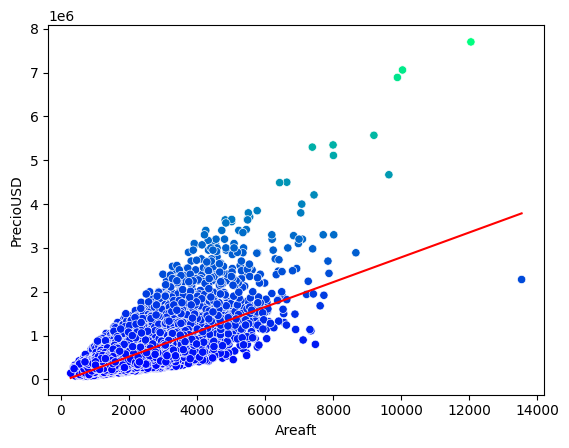

In [71]:
import seaborn as sns
axes = sns.scatterplot(data=kchouse ,x="Areaft", y="PrecioUSD", hue = "PrecioUSD", palette = "winter",legend=False)

import numpy as np

x = np.array([min(kchouse.Areaft.values),max(kchouse.Areaft.values)])
y = predice(x)

import matplotlib.pyplot as plt

line = plt.plot(x,y,color="red")

## 15.5 Regresion lineal multiple con los datos de California

### 15.5.1 Cargar el dataset

In [72]:
from sklearn.datasets import fetch_california_housing

In [73]:
california = fetch_california_housing() #Este es el dataset de train.csv, uno muy famoso de datos de las casas de california del 1990 integrado como libreria en sklearn

In [74]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [75]:
california.data.shape

(20640, 8)

In [76]:
california.target.shape

(20640,)

In [77]:
california.feature_names #Titulo de las columnas

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

### 15.5.2 Explorar los datos

Importa Pandas si no lo has hecho, altera las precisiones a 4, max columns a 9 y display width a none

In [78]:
#import pandas as pd

In [79]:
pd.set_option("display.precision",4)

In [80]:
pd.set_option("display.max_columns",9)

In [81]:
pd.set_option("display.width",None)

Carga los datos de california en un dataframe

In [82]:
california_df = pd.DataFrame(california.data, columns = california.feature_names)

Agrega el target de california al mismo dataframe como una columna (Serie) adicional

In [83]:
california_df["Target"]=california.target

Checa el head de california

In [84]:
california_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0    6.9841     1.0238       322.0    2.5556     37.88   
1  8.3014      21.0    6.2381     0.9719      2401.0    2.1098     37.86   
2  7.2574      52.0    8.2881     1.0734       496.0    2.8023     37.85   
3  5.6431      52.0    5.8174     1.0731       558.0    2.5479     37.85   
4  3.8462      52.0    6.2819     1.0811       565.0    2.1815     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

Hagamos un describe para ver que onda

In [85]:
california_df.describe()

MedInc    HouseAge    AveRooms   AveBedrms  Population    AveOccup  \
count  20640.0000  20640.0000  20640.0000  20640.0000  20640.0000  20640.0000   
mean       3.8707     28.6395      5.4290      1.0967   1425.4767      3.0707   
std        1.8998     12.5856      2.4742      0.4739   1132.4621     10.3860   
min        0.4999      1.0000      0.8462      0.3333      3.0000      0.6923   
25%        2.5634     18.0000      4.4407      1.0061    787.0000      2.4297   
50%        3.5348     29.0000      5.2291      1.0488   1166.0000      2.8181   
75%        4.7432     37.0000      6.0524      1.0995   1725.0000      3.2823   
max       15.0001     52.0000    141.9091     34.0667  35682.0000   1243.3333   

         Latitude   Longitude      Target  
count  20640.0000  20640.0000  20640.0000  
mean      35.6319   -119.5697      2.0686  
std        2.1360      2.0035      1.1540  
min       32.5400   -124.3500      0.1500  
25%       33.9300   -121.8000      1.1960  
50%       34.2600   -118.4900      1.7970  
75%       37.7100   -118.0100      2.6472  
max       41.9500   -114.3100      5.0000

### 15.5.3 Visualizar los datos

Vamos a armar un muestreo del 10% del dataset para ver mas facil las visualizaciones

In [86]:
muestra_cal_df = california_df.sample(frac=0.1,random_state=17) #Coge una muestra de valores aleatorios de california_df, tantos como el 10% del california_df

Importa Matplotlib

In [87]:
#impor matplotlib.pyplot as plt

IMporta Seaborn

In [88]:
#import seaborn as sns

Cambia la fuente de seaborn

In [89]:
sns.set(font_scale=2)

Ponlo tipo Whitegrid

In [90]:
sns.set_style("whitegrid")

Arma graficas de precio vs cada feature

C:\Users\Abri\AppData\Local\Temp\ipykernel_8312\1395219974.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=muestra_cal_df, x = feature, y = "Target", palette="Winter",legend=False)
C:\Users\Abri\AppData\Local\Temp\ipykernel_8312\1395219974.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=muestra_cal_df, x = feature, y = "Target", palette="Winter",legend=False)
C:\Users\Abri\AppData\Local\Temp\ipykernel_8312\1395219974.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=muestra_cal_df, x = feature, y = "Target", palette="Winter",legend=False)
C:\Users\Abri\AppData\Local\Temp\ipykernel_8312\1395219974.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=muestra_cal_df, x = feature, y = "Target", palette="Winter",legend=False)
C:\Users\Abri\AppData\Local\Temp\ipykernel_8

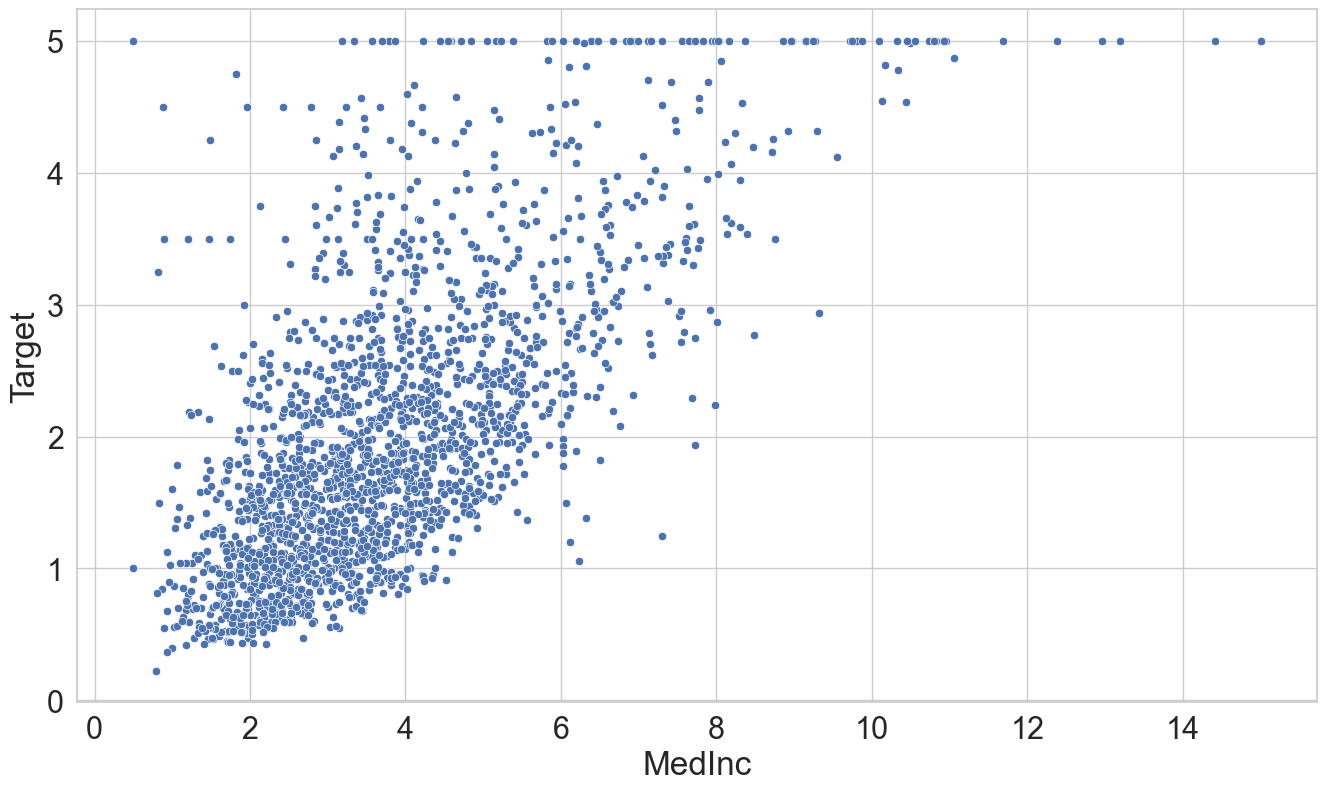

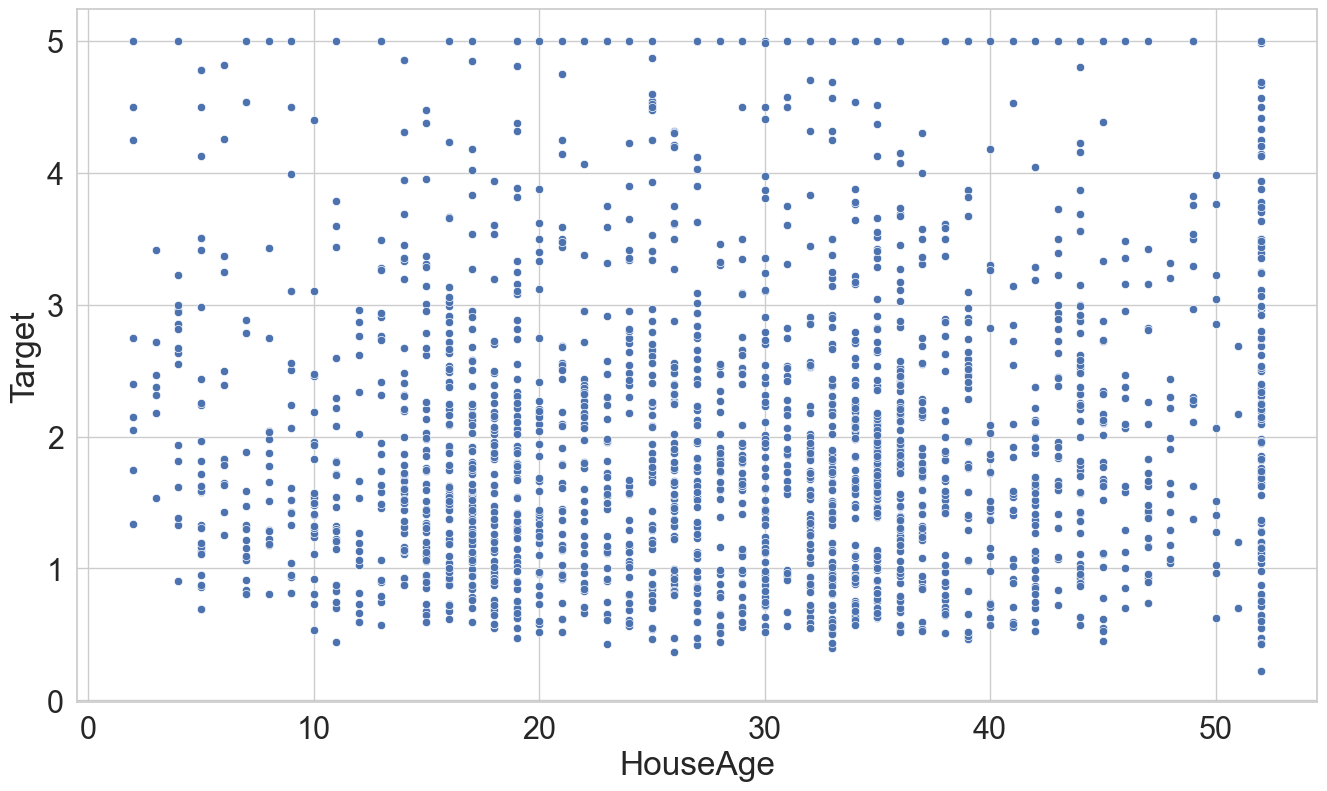

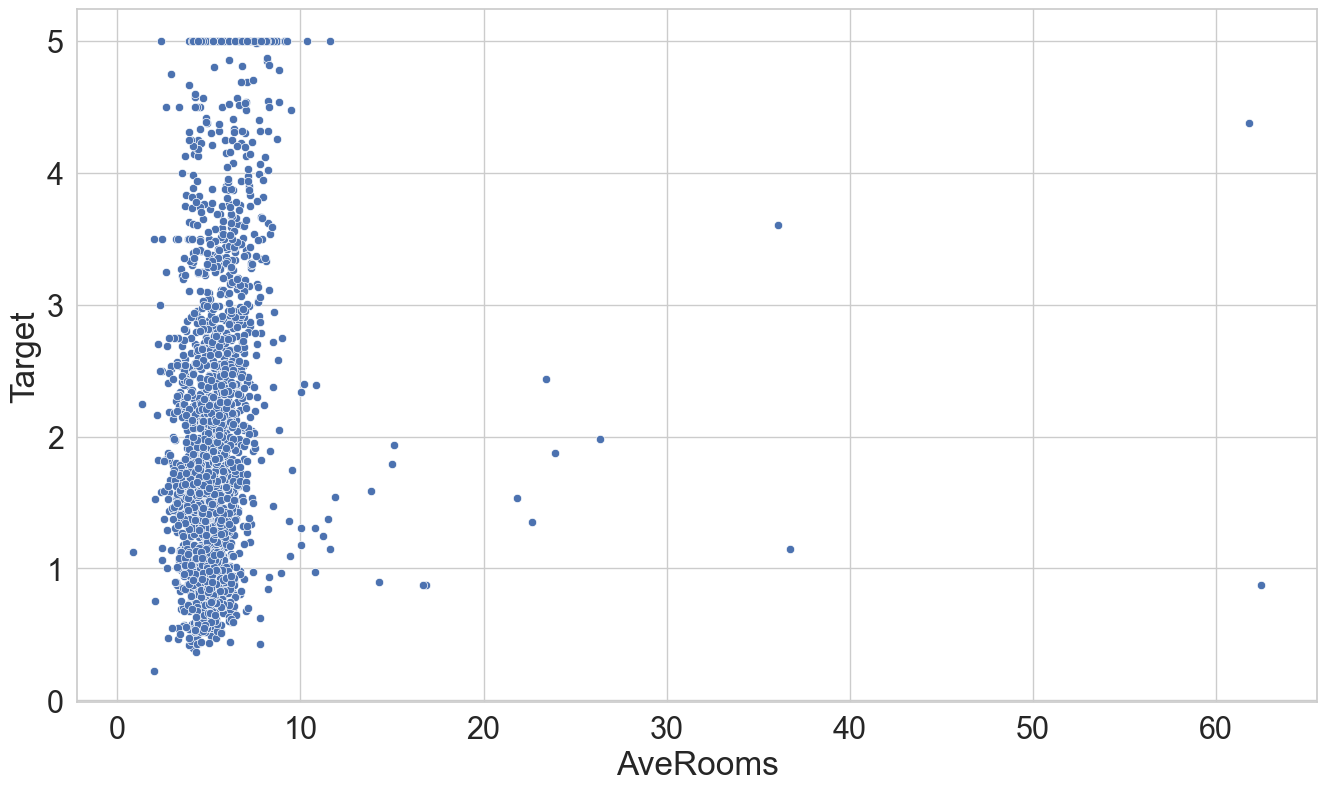

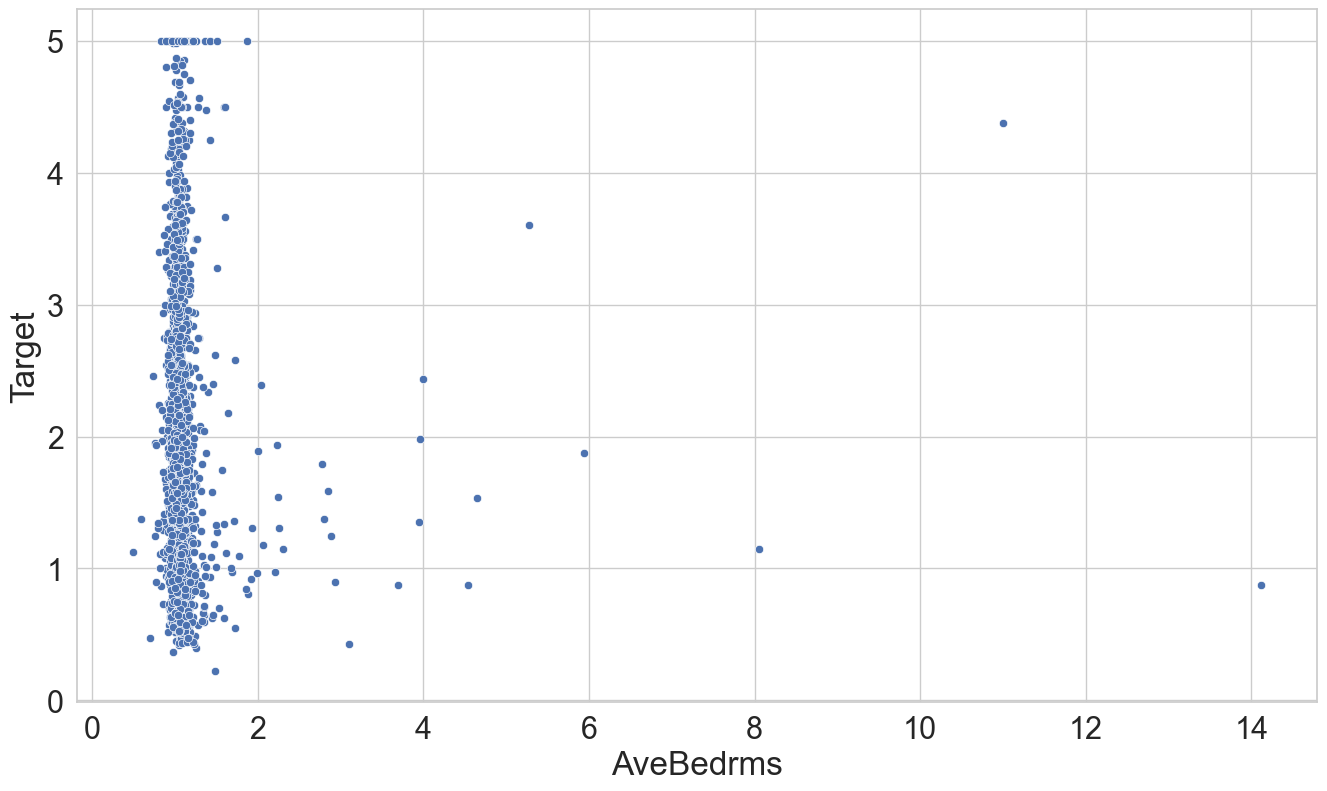

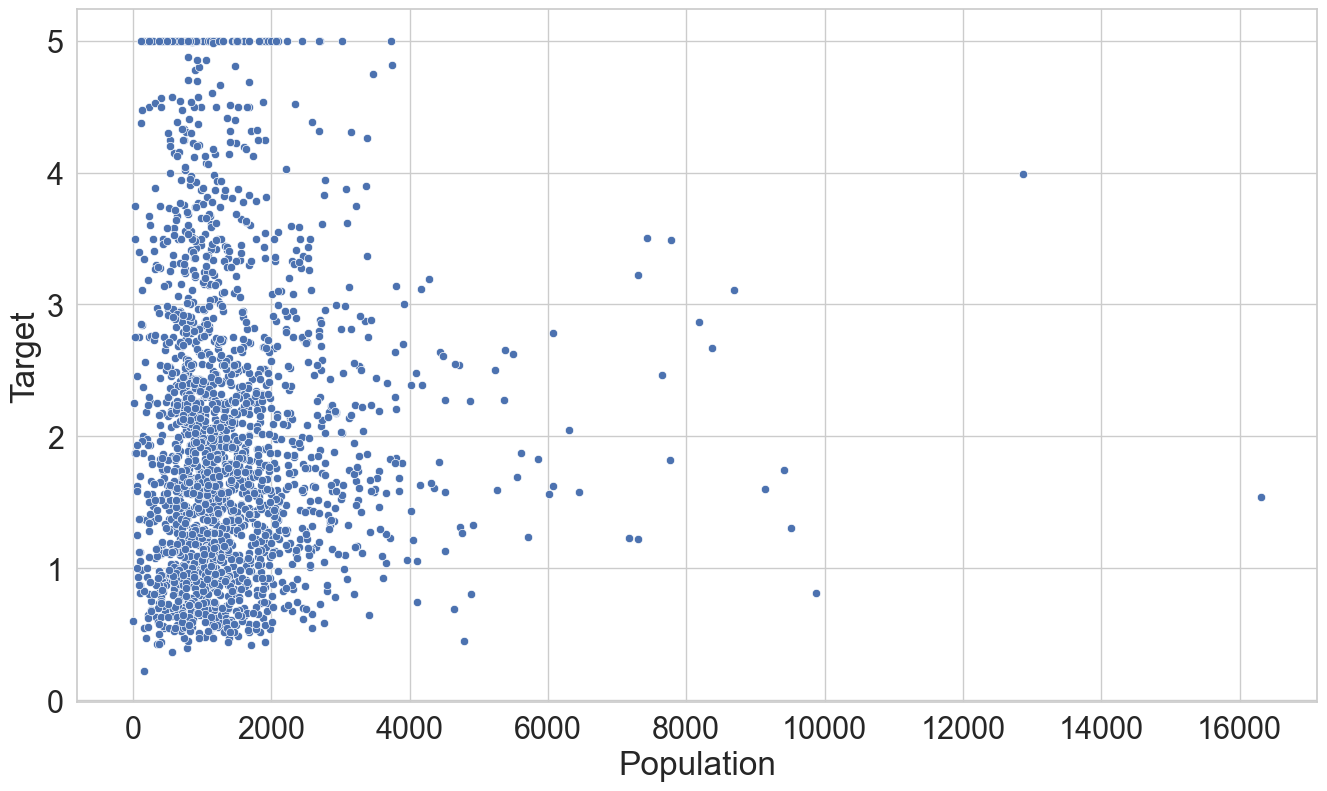

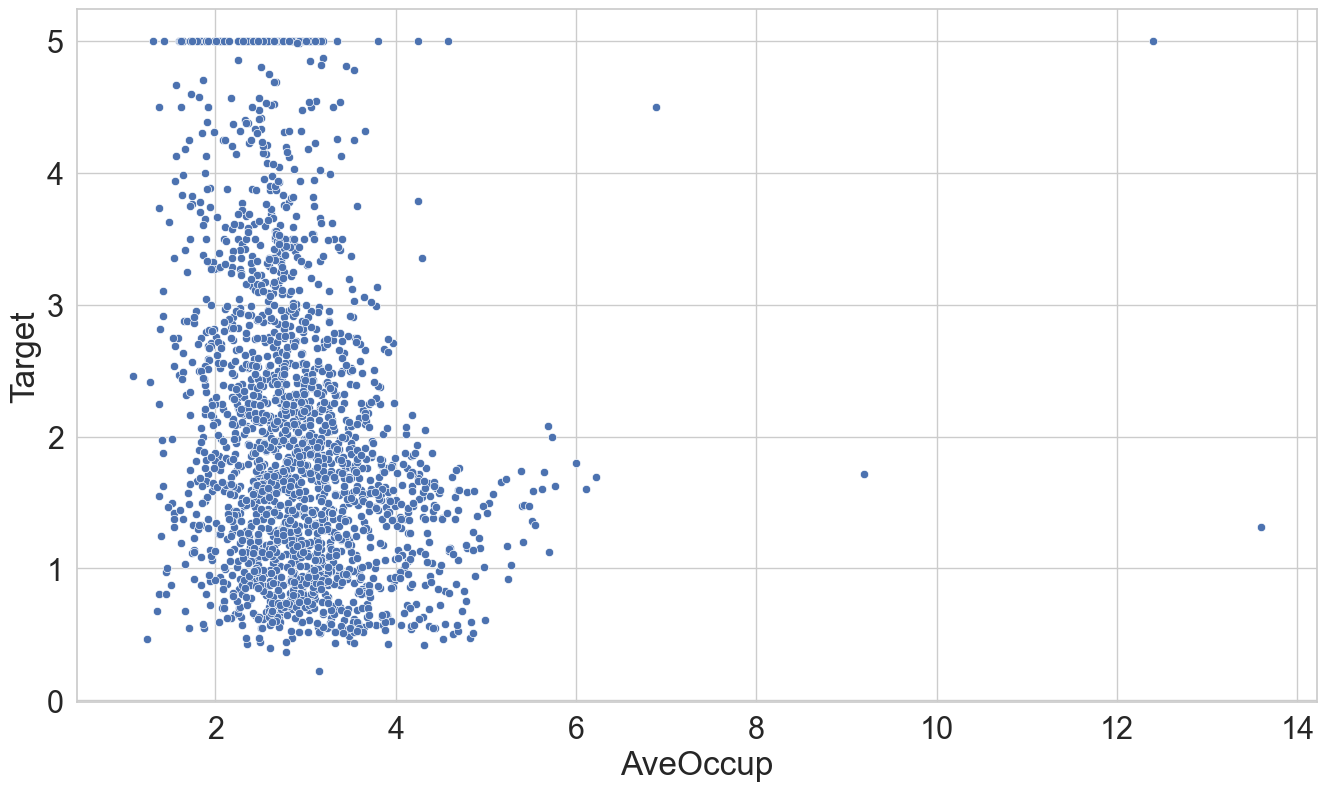

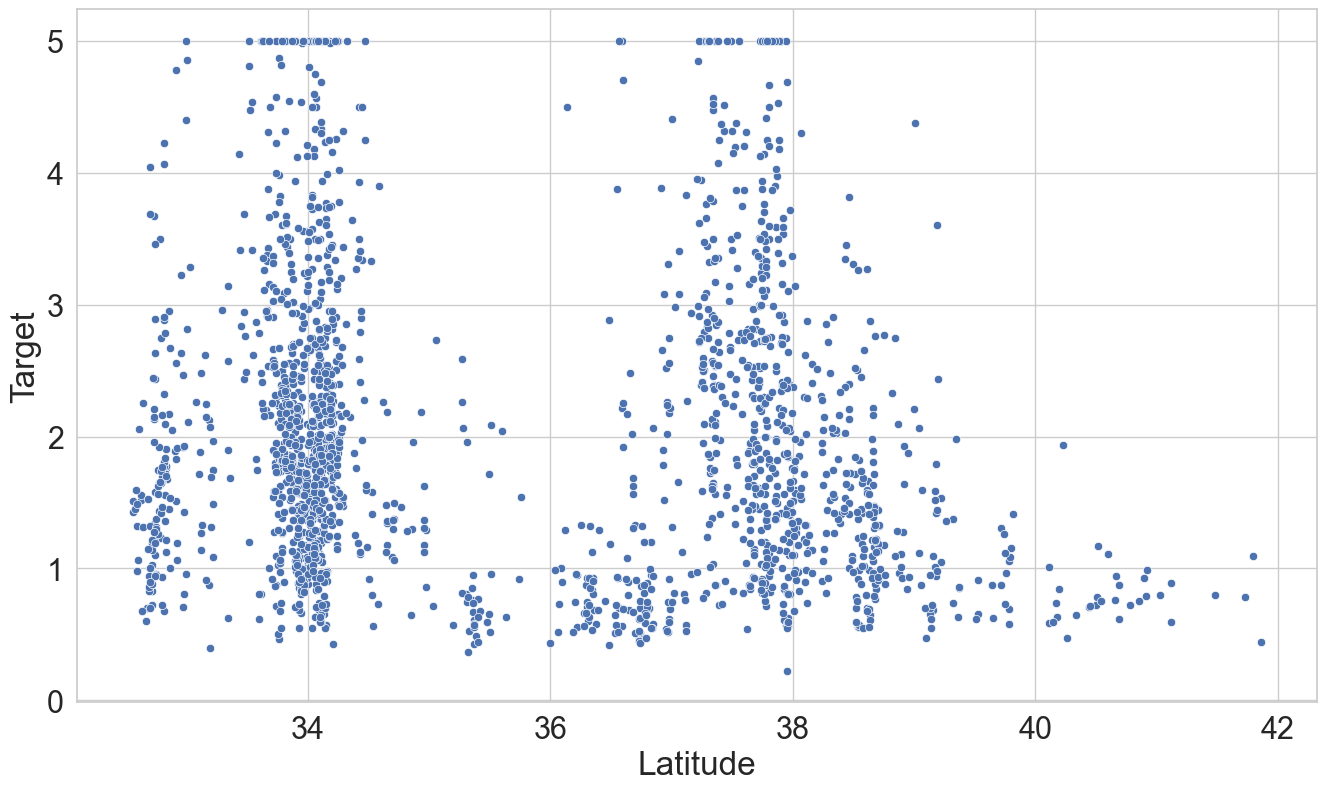

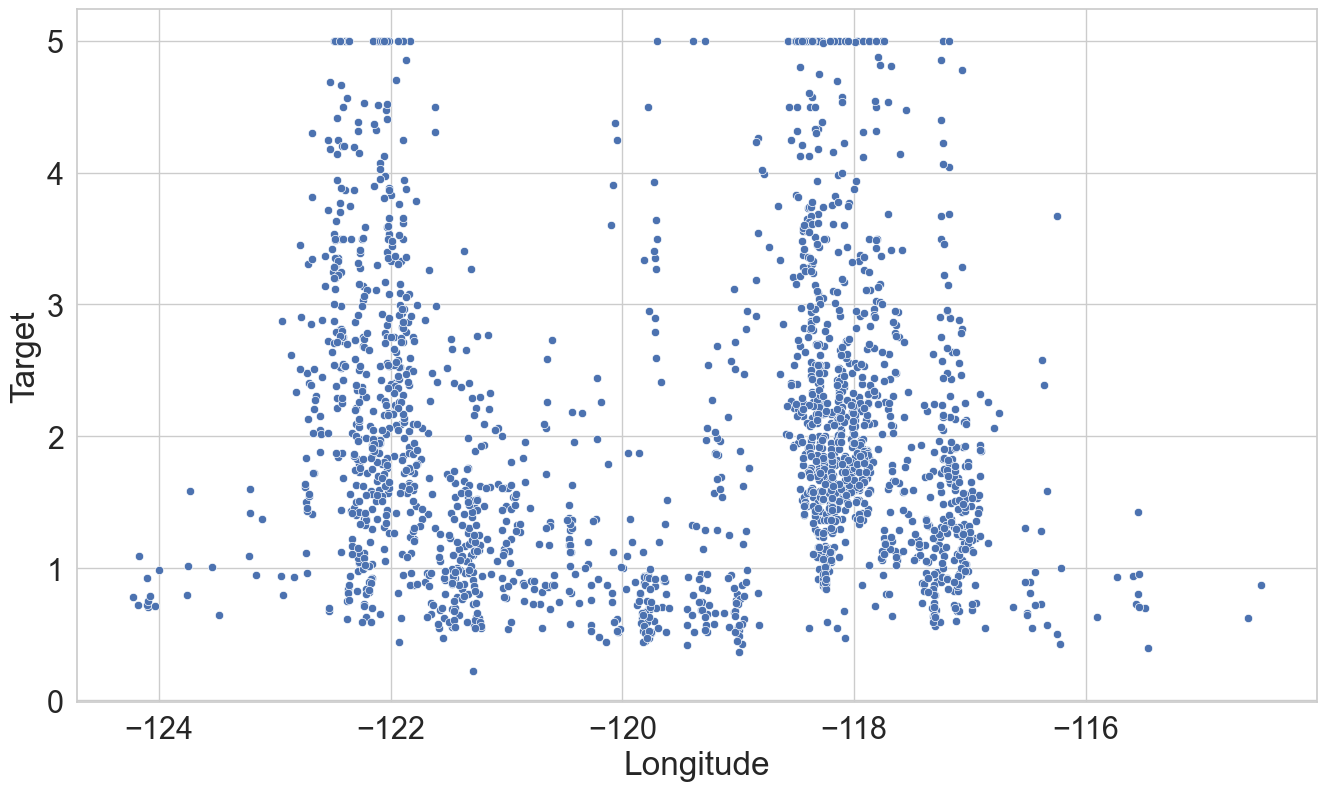

In [91]:
for feature in california.feature_names:
    plt.figure(figsize=(16,9))
    sns.scatterplot(data=muestra_cal_df, x = feature, y = "Target", palette="Winter",legend=False)

### 15.5.4 Separar los datos para training y pruebas

Importa de sklearn.model_selection el train_test_split

In [92]:
#from sklearn.model_selection import train_test_split

Arma tu train test split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target,random_state = 11)

Checa las figura de train

In [94]:
X_train.shape

(15480, 8)

Checa la figura de test

In [95]:
X_test.shape

(5160, 8)

### 15.5.5 Entrenar el modelo

Importa LinearRegression desde sklearn.linear_model

In [96]:
#from sklearn.lieanr_model_ import LinearRegression

arma tu objeto reglin

In [97]:
reglin = LinearRegression()

Haz el fit

In [98]:
reglin.fit(X=X_train, y=y_train)

LinearRegression()

Arma tu for para enumerar todos los coeficientes

In [99]:
for i,name in enumerate(california.feature_names):
    print(f'{name:>10}: {reglin.coef_[i]}')

    MedInc: 0.43770302153822027
  HouseAge: 0.009216834565797959
  AveRooms: -0.10732526637360937
 AveBedrms: 0.6117133073918071
Population: -5.756822009277476e-06
  AveOccup: -0.003384566465716359
  Latitude: -0.4194818609649065
 Longitude: -0.4337713349874012


Obten el intercept

In [100]:
reglin.intercept_

np.float64(-36.882950656055485)

### 15.5.6  Probar el modelo

Arma tu prediccion

In [101]:
prediccion = reglin.predict(X_test)

Arma tu lista de valores esperados

In [102]:
esperados = y_test

vamos a ver las primeras 5 predicciones

In [103]:
esperados[:5]

array([0.762, 1.732, 1.125, 1.37 , 1.856])

vs los primeros 5 valores esperados

### 15.5.7  Visualizar los precios esperados vs predecidos

Arma un Dataframe vacio

In [104]:
df = pd.DataFrame()

Agregale una columna con los precios esperados

In [105]:
df["Esperados"] = pd.Series(esperados)

Otra con los precios predichos

In [106]:
df["Predecidos"] = pd.Series(prediccion)

Arma una figura de plt

Metele un scatterplot de seaborn

C:\Users\Abri\AppData\Local\Temp\ipykernel_8312\3229215067.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  axes = sns.scatterplot(data = df, x = "Esperados", y = "Predecidos", palette = "cool", legend = False)


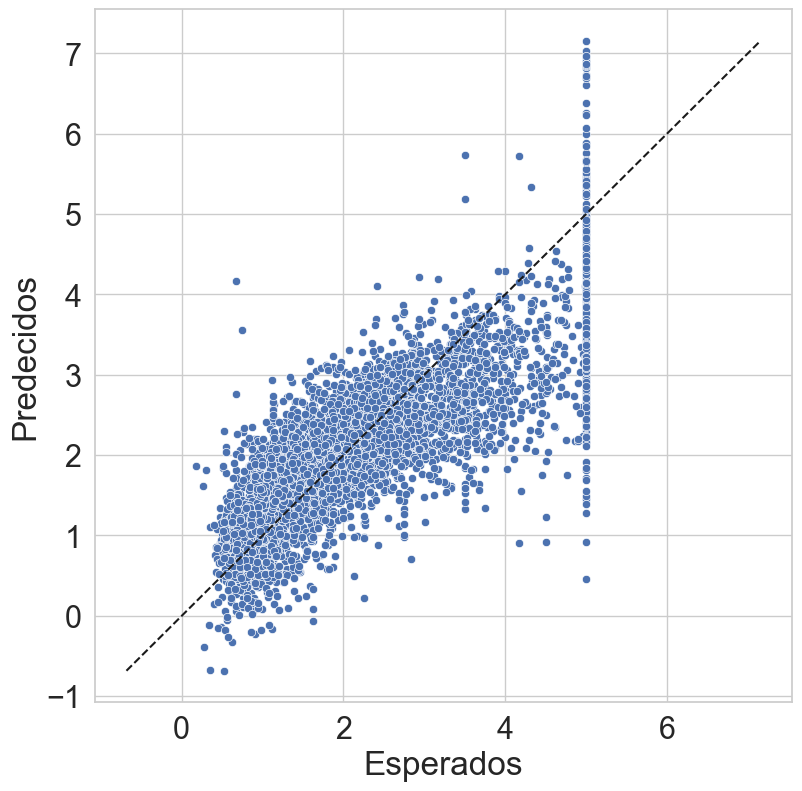

In [107]:
figura = plt.figure(figsize=(9,9))

axes = sns.scatterplot(data = df, x = "Esperados", y = "Predecidos", palette = "cool", legend = False)

start = min(esperados.min(),prediccion.min())
end = max(esperados.max(),prediccion.max())

line = plt.plot([start,end], [start,end], "k--")



### 15.5.8  Métricas del modelo de regresión

Importa metrics de sklearn

In [108]:
from sklearn import metrics
from sklearn.metrics import r2_score


Saca el r2

In [109]:
metrics.r2_score(esperados,prediccion) #60% (Esta muy bien)
#Dato = 1: comparación perfecta
#Dato = 0: comparación nula
#Dato = -1: comparación pefecta inversa

0.6008983115964333

Saca el Mean Squared Error (Promedio de Errores Cuadrados)

In [110]:
metrics.mean_squared_error(esperados,prediccion) # Cuanto más se acerque a 0, menos errores hay

0.5350149774449119

Buena prediccion, pero demasiados errores para ser profesional

### 15.5.9  Escoger el mejor modelo

In [111]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [112]:
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target,random_state = 11)

In [113]:
model_lasso = Lasso()
model_ridge = Ridge()
model_elastic = ElasticNet()

In [114]:
model_lasso.fit(X_train, y_train)

Lasso()

In [115]:
model_ridge.fit(X_train, y_train)

Ridge()

In [116]:
model_elastic.fit(X_train, y_train)

ElasticNet()

In [117]:
# 4️⃣ Hacemos predicciones
y_pred_lasso = model_lasso.predict(X_test)
y_pred_ridge = model_ridge.predict(X_test)
y_pred_elastic = model_elastic.predict(X_test)

# 5️⃣ Calculamos R²
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_elastic = r2_score(y_test, y_pred_elastic)

In [118]:
print(f"Lasso R²: {r2_lasso:.2%}")
print(f"Ridge R²: {r2_ridge:.2%}")
print(f"ElasticNet R²: {r2_elastic:.2%}")

Lasso R²: 28.22%
Ridge R²: 60.09%
ElasticNet R²: 41.80%


In [119]:
estimadores = {"Regin":LinearRegression(), "ElasticNet": ElasticNet(),"Lasso": Lasso(),"Ridge":Ridge()}
#from sklearn.model_selection import KFold, cross_val_score

for promest,objest in estimadores.items():
    kfold = KFold(n_splits=10,random_state=11,shuffle=True)
    puntuajes = cross_val_score(estimator=objest, X = california.data, y = california.target, cv = kfold, scoring = "r2")
    print(f'{promest:>16}:' + f'Promedio de puntuajes R2={puntuajes.mean():.2%}')

           Regin:Promedio de puntuajes R2=59.94%
      ElasticNet:Promedio de puntuajes R2=42.25%
           Lasso:Promedio de puntuajes R2=28.45%
           Ridge:Promedio de puntuajes R2=59.94%


🧠 Explicación rápida

Lasso (L1) tiende a eliminar variables irrelevantes (coeficientes → 0).

Ridge (L2) reduce la magnitud de los coeficientes pero no los elimina.

ElasticNet combina ambos: buen equilibrio si tienes muchas variables correlacionadas.

## 15.6 Aprendizaje no supervisado parte 1 (con lo del principio (nº dibujado-valor numerico) va a buscar la manera de simplificar las dimensiones de un 8x8 a un nx2)

Importa load_digits (de nuevo) desde sklearn.datasets

In [120]:
from sklearn.datasets import load_digits

arma tu objeto load_digits

In [121]:
digits = load_digits()

Importa TSNE desde sklearn.manifold (T-distributed stochastic neighbour embedding) #Estimador para modificar algo a las dimenswiones que les pedimos (hay otro como el PCA (principal component analysis) que veremos más adelante)

In [122]:
from sklearn.manifold import TSNE

arma tu objeto tsne

In [123]:
tsne = TSNE(n_components = 2, random_state = 11)

Transforma tus datos al numero especifico de dimensiones y entrena al estimador

In [124]:
datos_reducidos = tsne.fit_transform(digits.data)

Checa la forma de tus datos

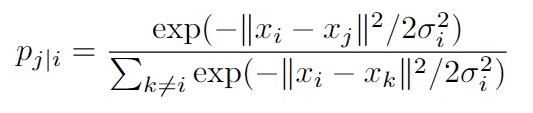

In [125]:
datos_reducidos.shape

(1797, 2)

Vamos a mostrar los datos uasndo el scatter de matplotlib, importa matplotlib

In [126]:
import matplotlib.pyplot as plt 

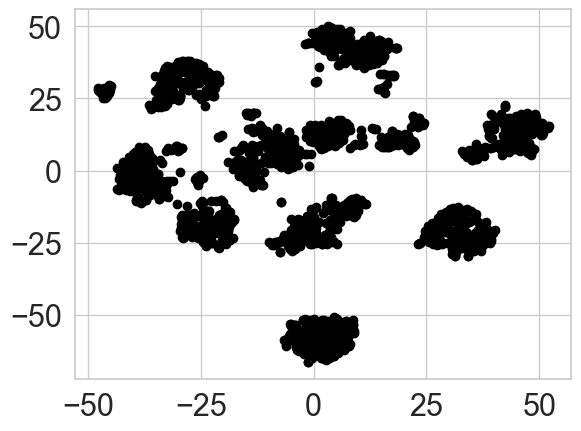

In [127]:
dots = plt.scatter(datos_reducidos[:,0],datos_reducidos[:,1],c="black") #No sabemos ni que es cada eje pero sabemos que ya ha separado en n grupos

Y el sacatter

Ahora haz el scatter con colores diferentes

C:\Users\Abri\AppData\Local\Temp\ipykernel_8312\3882157405.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  dots =plt.scatter(datos_reducidos[:,0],datos_reducidos[:,1],c=digits.target, cmap=plt.cm.get_cmap("nipy_spectral_r",10))


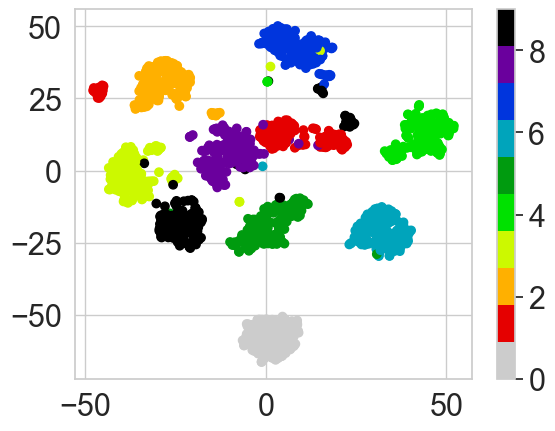

In [128]:
dots =plt.scatter(datos_reducidos[:,0],datos_reducidos[:,1],c=digits.target, cmap=plt.cm.get_cmap("nipy_spectral_r",10))
colorbar = plt.colorbar(dots)

#Hemos hecho clustering (agrupaciones de cosas parecidas)

## 15.7 Aprendizaje no supervisado parte 2 (clasificar sin etiqueta, yo pongo un valor parecido a otro donde se que coincide con una agrupación)

### 15.7.1  Cargar el Dataset de Iris

Carga load_iris de sklearn.datasets

In [129]:
from sklearn.datasets import load_iris

Arma un objeto iris de load_iris

In [130]:
iris = load_iris()

Veamos la descripción del dataset

In [131]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

Veamos la figura del iris.data

In [132]:
iris.data.shape

(150, 4)

La figura del iris.shape

In [133]:
iris.target.shape

(150,)

Conozcamos los posibles targets con target_names

In [134]:
iris. target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Y también los feature names

In [135]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### 15.7.2  Explorar el dataset de Iris

Importamos pandas

In [136]:
import pandas as pd

Le decimos que maximo 5 columans

In [137]:
pd.set_option("display.max_columns",5)

Y sin display width

In [138]:
pd.set_option("display.width",None)

Cargamos un dataframe con iris.data

In [139]:
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)

Y le pegamos las especies que vienen de iris.target_names

In [140]:
iris_df["especie"] = [iris.target_names[i] for i in iris.target]

Checa el head del dataset

In [141]:
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  especie  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

Pon la precision de pandas a 2 decimales

In [142]:
pd.set_option("display.precision",2)

Armate un describe del dataframe

In [143]:
iris_df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count             150.00            150.00             150.00   
mean                5.84              3.06               3.76   
std                 0.83              0.44               1.77   
min                 4.30              2.00               1.00   
25%                 5.10              2.80               1.60   
50%                 5.80              3.00               4.35   
75%                 6.40              3.30               5.10   
max                 7.90              4.40               6.90   

       petal width (cm)  
count            150.00  
mean               1.20  
std                0.76  
min                0.10  
25%                0.30  
50%                1.30  
75%                1.80  
max                2.50

Y un describe de la columna de species solamente

In [144]:
iris_df["especie"].describe()

count        150
unique         3
top       setosa
freq          50
Name: especie, dtype: object

### 15.7.3  Visualizar el Dataset con Pairplot

Importa seaborn si no lo has hecho

In [145]:
import seaborn as sns


Cambia la fuente a 1.1

In [146]:
sns.set(font_scale=1.1)

Ponlo estilo whitegrid

In [147]:
sns.set_style("whitegrid")

Arma tu pairplot en un objeto llamado cuadricula

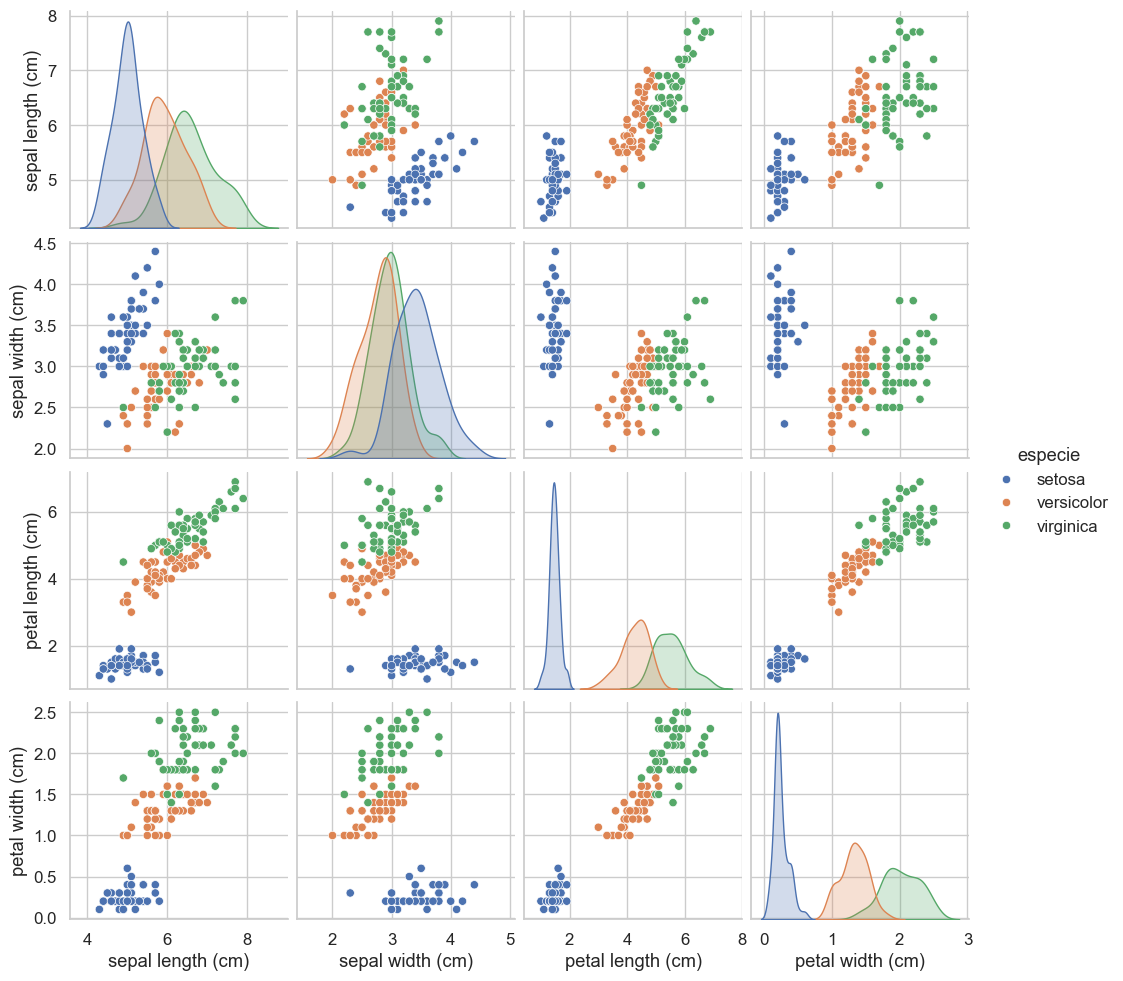

In [148]:
cuadricula_pairplot = sns.pairplot(data = iris_df, vars = iris_df.columns[0:4], hue = "especie") #COmprensión de gráfica a 4 dimensiones

Ahora mostremos el pairplot en un solo color

### 15.7.4  Usar un estimador KMeans

Vamos a importar Kmeans desde sklearn.cluster

Ahora creamos el estimador

Entrenamos el modelo con el metodo .fit

Imprimimos los primeros 50 resultados

Ahora los segundos 50

Y los ultimos 50

### 15.7.4  Reducción de dimensionalidad con PCA

Importa PCA de sklearn.decomposition

Arma tu estimador PCA

Arma el fit

Y luego transforma los datos usando transform

checa la figura de los datos que devolvió

Veamos losd datos reducidos, pasa esos nuevos datos a un dataframe

pegale la especie a ese dataframe

arma un scatterplot en seaborn

Vamos armando un objeto centroide para mostrar en seaborn

importa matplotlib

Muestra los scatter

### 15.7.4  Escoger el mejor estimador de CLustering

importa DBSCAN, Meanshift, spectral clustering, agglomerative clustering

Arma un diccionario con los estimadores

importa Numpy as np

arma el for que va a hacer los estimadores